Chapter 1 - part 2
======
***

### Our Bayesian framework

We are interested in beliefs, which can be interpreted as probabilities by thinking Bayesian. We have a *prior* belief in event $A$, beliefs formed by previous information, e.g., our prior belief about bugs being in our code before performing tests.

Secondly, we observe our evidence. To continue our buggy-code example: if our code passes $X$ tests, we want to update our belief to incorporate this. We call this new belief the *posterior* probability. Updating our belief is done via the following equation, known as Bayes' Theorem, after its discoverer Thomas Bayes:

\begin{align}
P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) }
\end{align}

\begin{align}
P( A | X ) \propto P(X | A) P(A)\;\; \\\\
\text{posterior } \propto \text{evidence * prior} \\\\
(\propto  \text{means "is proportional to" })
\end{align}

The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | X )$.

## Example: Mandatory coin-flip example

Every statistics text must contain a coin-flipping example, I'll use it here to get it out of the way. Suppose, naively, that you are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be. 

We begin to flip a coin, and record the observations: either $H$ or $T$. This is our observed data. An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. 

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

figsize(5, 3)

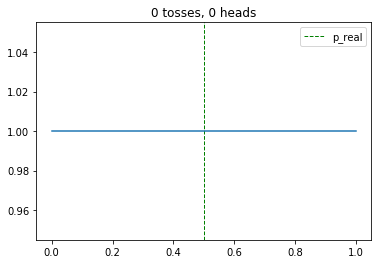

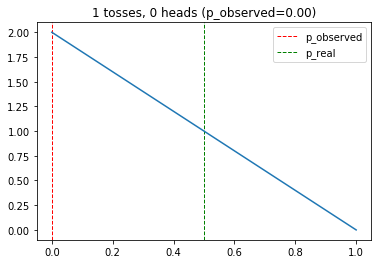

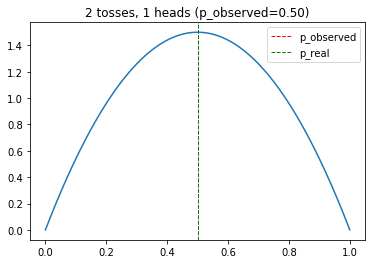

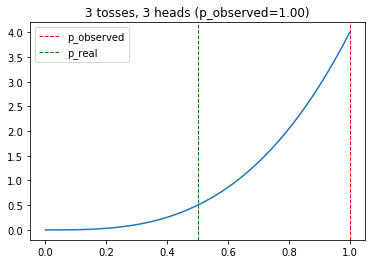

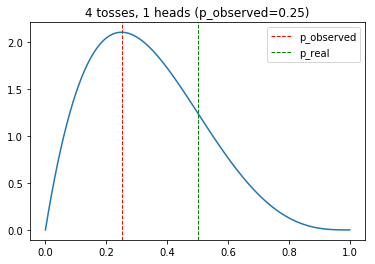

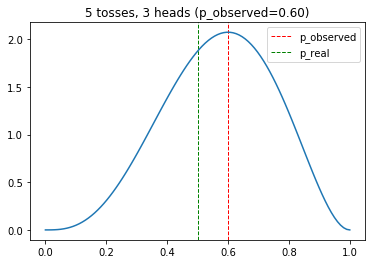

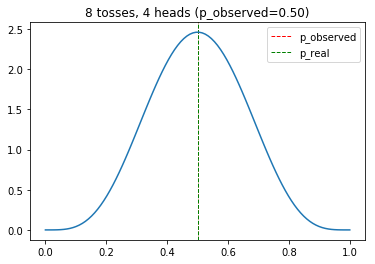

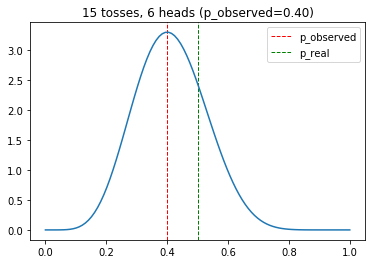

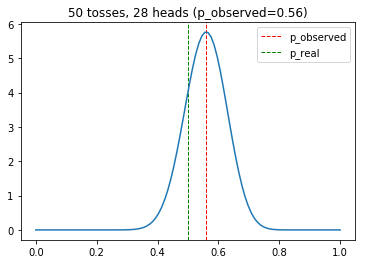

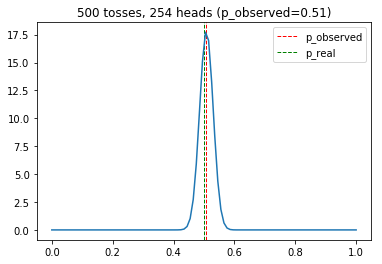

In [2]:
n_tosses = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500] # number of tosses for each experiments
x = np.linspace(0, 1, 100)
p_real = 0.5 # probability of getting head is 0.5 = 50%

# let's do one experiment (with N coin tosses)
# for each number in n_tosses
for N in n_tosses:
    heads = stats.bernoulli.rvs(p_real, size=N).sum()
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    if N==0:
        plt.title('{} tosses, {} heads'.format(N, heads))
    else:
        plt.title('{} tosses, {} heads (p_observed={:.2f})'.format(N, heads, float(heads)/N))
        plt.axvline(float(heads)/N, label='p_observed', c='r',linestyle="--", lw=1)
    plt.axvline(0.5, label='p_real', c='g',linestyle="--", lw=1)
    plt.plot(x,y)
    plt.legend()
    plt.show()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line). 

Notice that the plots are not always *peaked* at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what $p$ is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased *away* from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head?). As more data accumulates, we would see more and more probability being assigned at $p=0.5$, though never all of it.

The next example is a simple demonstration of the mathematics of Bayesian inference. 

## Example: my code passed all the tests, does it still have bugs?


Let $A$ denote the event that our code has **no bugs** in it. Let $X$ denote the event that the code passes all debugging tests. For now, we will leave the prior probability of no bugs as a variable, i.e. $P(A) = p$. 

We are interested in $P(A|X)$, i.e. the probability of no bugs, given our debugging tests $X$. To use the formula above, we need to compute some quantities.

What is $P(X | A)$, i.e., the probability that the code passes $X$ tests *given* there are no bugs? Well, it is equal to 1, for a code with no bugs will pass all tests. 

$P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs (denoted $\sim A\;$, spoken *not $A$*), or event $X$ without bugs ($A$). $P(X)$ can be represented as:

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

We have already computed $P(X|A)$ above. On the other hand, $P(X | \sim A)$ is subjective: our code can pass tests but still have a bug in it, though the probability there is a bug present is reduced. Note this is dependent on the number of tests performed, the degree of complication in the tests, etc. Let's be conservative and assign $P(X|\sim A) = 0.5$. Then

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}
This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

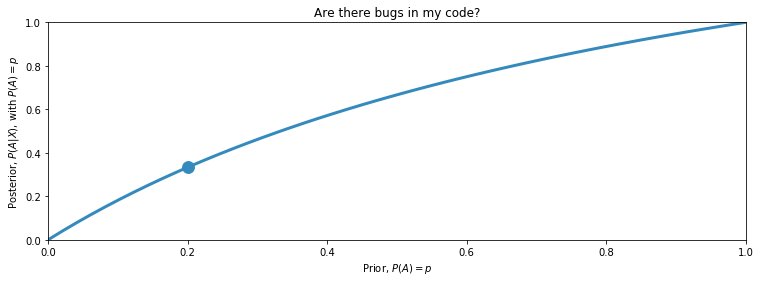

In [3]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?");

We can see the biggest gains if we observe the $X$ tests passed when the prior probability, $p$, is low. Let's settle on a specific value for the prior. I'm a strong programmer (I think), so I'm going to give myself a realistic prior of 0.20, that is, there is a 20% chance that I write code bug-free. To be more realistic, this prior should be a function of how complicated and large the code is, but let's pin it at 0.20. Then my updated belief that my code is bug-free is 0.33. 

Recall that the prior is a probability: $p$ is the prior probability that there *are no bugs*, so $1-p$ is the prior probability that there *are bugs*.

Similarly, our posterior is also a probability, with $P(A | X)$ the probability there is no bug *given we saw all tests pass*, hence $1-P(A|X)$ is the probability there is a bug *given all tests passed*. What does our posterior probability look like? Below is a chart of both the prior and the posterior probabilities. 


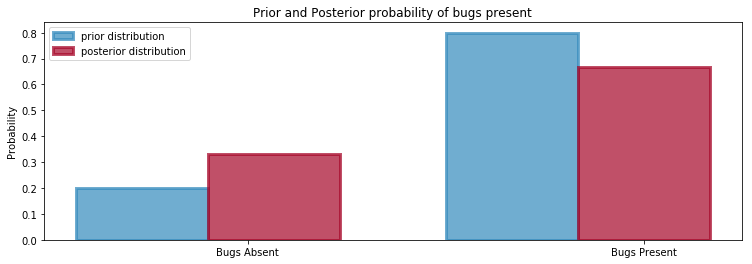

In [4]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1./3, 2./3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Notice that after we observed $X$ occur, the probability of bugs being absent increased. By increasing the number of tests, we can approach confidence (probability 1) that there are no bugs present.

This was a very simple example of Bayesian inference and Bayes rule. Unfortunately, the mathematics necessary to perform more complicated Bayesian inference only becomes more difficult, except for artificially constructed cases. We will later see that this type of mathematical analysis is actually unnecessary. First we must broaden our modeling tools. The next section deals with *probability distributions*. If you are already familiar, feel free to skip (or at least skim), but for the less familiar the next section is essential.

### References


-  [1] Gelman, Andrew. N.p.. Web. 22 Jan 2013. [N is never large enough](http://andrewgelman.com/2005/07/31/n_is_never_larg).
-  [2] Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- [3] Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- [4] Jimmy Lin and Alek Kolcz. Large-Scale Machine Learning at Twitter. Proceedings of the 2012 ACM SIGMOD International Conference on Management of Data (SIGMOD 2012), pages 793-804, May 2012, Scottsdale, Arizona.
- [5] Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.